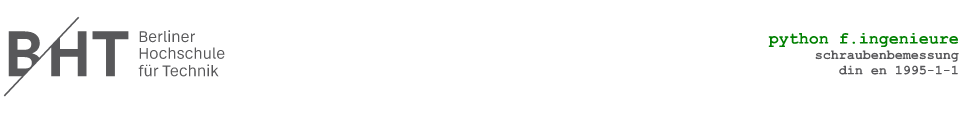

# Anwendungsbeispiel 1: Stützenbemessung
## Allgemeines

Das Ersatzstabverfahren ist ein vereinfachtes Nachweisverfahren, welches die Schnittgrößen nach der *Theorie I. Ordnung*, also am unverformten System, ermittelt und dabei die geometrische Nichtlinearität für die Versagensfälle Knicken und Kippen anhand einer Abminderung der Festigkeit berücksichtigt. Üblicherweise kommt dieses Verfahren bei der Betrachtung von Einzelstäben zum Einsatz. Im Folgenden wird der Nachweis anhand eines Rechenbeispiels weiter erläutert und dabei in Python programmiert. 

Grundsätzlich wird das Skript so aufgebaut, dass sämtliche Eingabewerte am Anfang definiert werden, sodass bei der weiteren Nutzung der Nachweis schneller angepasst werden kann. 

### Eingangswerte
#### Bibliotheken

Um den Funktionsumfang eines Skriptes zu erweitern, können Bibliotheken importiert werden. Dies erfolgt generell am Anfang des Codes und soll dabei wie folgt priorisiert werden:

1)	Module aus Standardbibliothek <br>
2)	sonstige Module <br>
3)	eigene Module <br>

Die einzelnen Gruppen werden alphabetisch geordnet.

In [68]:
from math import sqrt, pi, cos, sin  #Mathematische Funktionen
import handcalcs.render              #Darstellung formattierter Gleichungen

#### System

**Rechenbeispiel** <br>
Betrachtet wird eine Pendelstütze, die durch eine zentrische Druckkraft und doppelter Biegung beansprucht wird.

Mit dem Modul *handcalcs* werden die Ausgaben gerendert ausgegeben. Dies erfolgt automatisch, wenn zu Beginn des Eingabefeldes der Befehl **%%render** steht. Kommentare werden nach einem Rautezeichen geschrieben und in der Ausgabe in Klammern dargestellt. Dies wird genutzt, um die Einheiten anzugeben.

**Link zur Online-Dokumentation** <br>
[handcalcs](https://github.com/connorferster/handcalcs)<br>

In [69]:
%%render
Lagerung = 'Pendelstütze'

<IPython.core.display.Latex object>

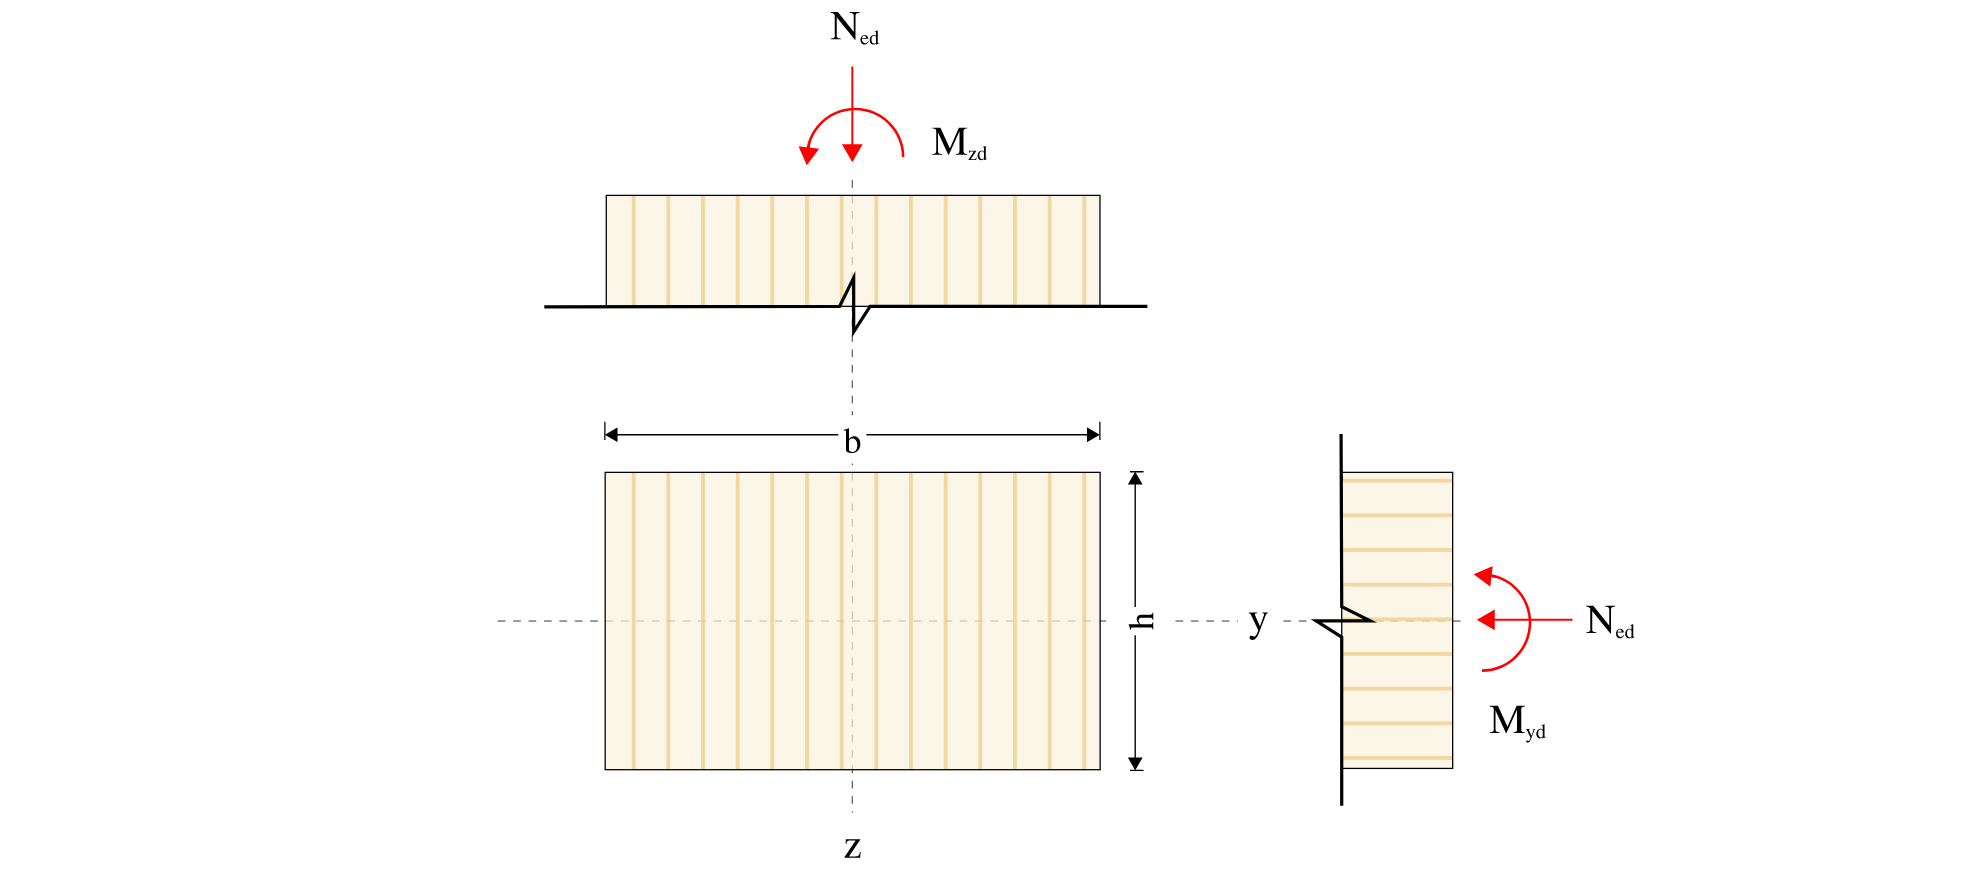
<center> Abbildung 1: Rechenbeispiel einer Holzstütze </center> <br>

#### Geometrie

**Variablen** <br>
Eines der grundlegenden Konzepte von Programmiersprachen und Computeranwendungen ist die Fähigkeit Informationen zu speichern. Damit beispielsweise eine Anwendung mathematische Berechnungen ausführen kann, ist es notwendig, dass es bestimmte Werte als Variablen speichert, um mit diesem Wert weitere Berechnungen durchzuführen. Dies tut es, indem die elektronischen Informationen (auch Bits) auf dem Arbeitsspeicher abgelegt werden. Sobald diese Informationen benötigt werden, können sie mit dem vorgegebenen Namen abgerufen werden (vgl. Bonacina 2018: 42 ff.).

In [70]:
%%render params 1
L = 3.6    #m - Länge
b = 0.6  #m - Breite
h = 0.6  #m - Höhe

<IPython.core.display.Latex object>

Eine Variable besteht aus dem Namen der Variable und der zugehörigen Information. Da es bei komplexeren Berechnungen schnell zu einer Vielzahl an Variablen kommt, ist darauf zu achten, dass die Wahl des Namens verständlich bleibt und die Eindeutigkeit einer Variablen bewahrt wird.

**Datentypen**

Die Information, die der Variable zugeordnet wird, gehört einem Datentypen an, der in Python automatisch erkannt wird. Dies vereinfacht das Programmieren, da auf die manuelle Festlegung des Datentypes verzichtet werden kann. Der Datentyp kann also innerhalb eines Programms geändert werden, ohne einen neuen Namen festlegen zu müssen. Die Basis-Datentypen, auch native Datentypen, sind:<br>

**Zahlen**
**integers**: ganze Zahlen <br>
```Python
1, 2, 3
```
**float**: Fließkommazahlen <br>
```Python
1.1, 2.1, 3.1
```
**string**: Zeichenketten <br>
```Python
"Zeichenkette"
```

**boolean**: Wahrheitswerte
```Python
True oder False
```

#### Bemessungswerte der Einwirkung

Variablen sollten grundsätzlich in Kleinbuchstaben benannt und mit einem Unterstrich getrennt werden, wenn sie aus mehreren Elementen bestehen. Wenn sie jedoch wie nachfolgend aus der Terminologie der Statik anders bekannt sind, sollte dies übernommen werden.

In [71]:
%%render params 1
N_ed = 2400 #kN - Normalkraft
M_yd = 30    #kNm - Moment um y-Achse
M_zd = 40    #kNm - Moment um z-Achse

<IPython.core.display.Latex object>

Auch Kommentare sollen nach einer einheitlichen Regelung verfasst werden. Sie helfen den Code zu umschreiben und sollten daher nicht im Widerspruch zum Skript stehen. Es sollten prägnante und möglichst kurze Formulierungen verwendet werden. Kommentare werden in Python mit einem Rautezeichen initiiert und sollen ohne Leerzeichen beginnen.

#### Charakteristische Festigkeitswerte

Es werden die charakteristischen Festigkeitswerte der Holzgüte GL28h herangezogen. Neben der Druckfestigkeit parallel zur Faserrichtung und den Biegefestigkeiten wird nach DIN EN 1995-1-1 6.3.1 (2) der 5%-Fraktilwert des Elastizitätsmoduls angesetzt. Der E-Modul E0,05 stellt einen Mittelwert dar, bei dem 5% der Prüfergebnisse kleiner ausfielen. 

In [72]:
%%render params 1
Güte = 'GL24h'        #Holzgüte
f_c0k = 24*1000       #$kN/m^2$ - Druck  
f_myk = 24*1000       #$kN/m^2$ - Biegung
f_mzk = 24*1000       #$kN/m^2$ - Biegung
E_0mean = 11500*1000  #$kN/m^2$ - E-Modul  
E_05 = 9600*1000      #$kN/m^2$ - E-Modul  
G_05 = 540*1000       #$kN/m^2$ - Schubmodul  

<IPython.core.display.Latex object>

#### Widerstandsbeiwerte

Die Widerstandsbeiwerte ergeben sich nach der DIN EN 1995-1-1 2.3.1 aus der Klasse der Lasteinwirkungsdauer und der Nutzungsklasse.

In [73]:
%%render
k_mod = 0.6      #Modifikationsbeiwert
gamma = 1.3      #Teilsicherheitsbeiwert
xi = k_mod/gamma #Abminderungsbeiwert

<IPython.core.display.Latex object>

### Berechnung

Nachdem alle Eingabewerte definiert worden sind, beginnt nun die Berechnung.

<div class="alert alert-block alert-warning">
<b>Anmerkung:</b> Im Skript wird ab dieser Stelle alles automatisch berechnet.
</div>

#### Bemessungswerte der Festigkeit

Mit den zuvor definierten Widerstandsbeiwerten werden die Festigkeitsbeiwerte abgemindert.

In [74]:
%%render
f_c0d = f_c0k*xi #$N/mm^2$ - Bemessungswert der Druckfestigkeit
f_myd =f_myk*xi  #$N/mm^2$ - Bemessungswert der Biegefestigkeit
f_mzd =f_mzk*xi  #$N/mm^2$ - Bemessungswert der Biegefestigkeit

<IPython.core.display.Latex object>

#### Querschnittsparameter

Für beide Achsrichtungen werden Querschnittsparameter bestimmt, die für die weitere Berechnung erforderlich sind. 

In [75]:
%%render params 3
A = b*h #$m^2$ - Querschnitt

<IPython.core.display.Latex object>

In [76]:
%%render params 5
I_y = (b*h**3)/12  #$m^4$ - FTM
w_y = (b*h**2)/6   #$m^3$ - Widerstandsmoment
i_y = h/sqrt(12)   #$m$ - polares Trägheitsmoment


I_z = (h*b**3)/12  #$m^4$ - FTM
w_z = (h*b**2)/6   #$m^3$ - Widerstandsmoment
i_z = b/sqrt(12)   #$m$ - polares Trägheitsmoment

<IPython.core.display.Latex object>

#### Spannungen

Anhand der Querschnittsparameter können die Spannungen berechnet werden.

In [77]:
%%render 5
sigma_cd = N_ed/(A)     #$kN/m^2$ - Druckspannung

sigma_myd = M_yd/w_y     #$kN/m^2$ - Biegespannung um y-Achse
sigma_mzd = M_zd/w_z      #$kN/m^2$ - Biegespannung um z-Achse

<IPython.core.display.Latex object>

#### Knicken

Das Biegeknicken einer Stütze entspricht eines der möglichen Versagensfälle, welches bei Stabilitätsuntersuchungen auftreten kann. Es wird in erster Linie durch Druckbeanspruchungen verursacht, welche im Tragwerk zu seitlichen Auslenkungen führen. Die daraus resultierenden Biegemomente verstärken das plötzliche Versagen der Stütze (vgl. Neuhaus 2017: 594).

**Knicklänge** <br>
Der Mathematiker Leonhard Euler beschrieb 1744 die Biegeverformbarkeit von Druckstäben mit Hilfe einer effektiven Länge. Dafür definierte er vier verschiedene Lagerungsarten, aus denen sich mit einem Knicklängenbeiwert β die Knicklänge ergibt. Anhand dieser Ersatzstablänge $l_{ef}$  wird die der Lagerung entsprechenden Verformungsfigur repräsentiert und die Knickgefährdung berücksichtigt (s. Abbildung).

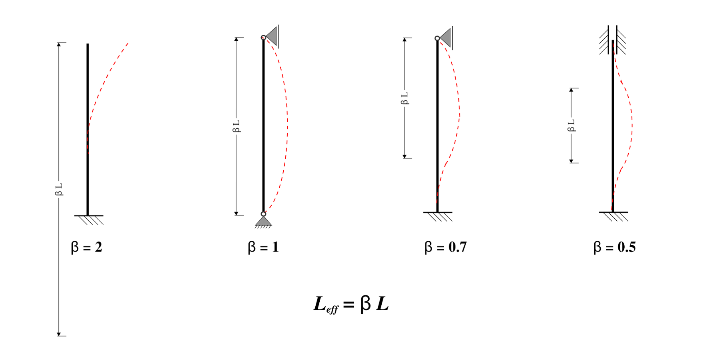
<center> Abbildung 2: Euler'sche Knickstäbe </center> <br>

Im Allgemeinen werden bei Stützen, die an den Enden horizontal unverschieblich gehalten sind, auf der sicheren Seite liegend eine gelenkige Lagerung angenommen. Dies entspricht einer Pendelstütze nach dem Eulerfall 2 und ergibt einen β-Wert von 1. Im Code wird dies mit einer *if-Abfrage* ermittelt.

In [78]:
#if-Abfrage zur Bestimmung von beta
if Lagerung == 'Pendelstütze':
    beta = 1
elif Lagerung == 'Kragstütze':
    beta = 2
elif Lagerung == 'Eingespannt (u/o)':
    beta = 0.7
else:
    beta = 0.5

In [79]:
%%render 
l_ef = beta*L #m - Knicklänge

<IPython.core.display.Latex object>

**Entscheidungsanweisung**

Mittels if-Abfragen wird es dem Programm ermöglicht Entscheidungen zu treffen, die an Bedingungen geknüpft sind. Python bietet mehrere Varianten an. Die klassische und ausführliche Form einer if-Abfrage wird wie folgt formuliert: 

```Python
if <test_1>: 
    wert_richtig_1
elif <test_2>: 
    wert_richtig_2
```

Dieselbe Anweisung kann ebenso kompakt in einer Zeile erfolgen.

```Python
if <test>: wert_richtig                  #Variante 2
wert_richtig if <test> else wert_falsch  #Variante 3
[wert_richtig, wert_falsch][<test>]      #Variante 4
```

**Knicklast** <br>
Anhand der effektiven Länge definiert Euler eine Knicklast Fki, bei der eine Stütze anfängt, seitlich auszuweichen. Diese lässt sich für einen beidseitig gelenkig gelagerten, ideal geraden Stab mit mittiger Drucklast wie folgt bestimmen: <br>
<br>
<center>
$F_{ki} = \frac{\pi*E*I^2}{l_{ef}^2}$

**Schlankheit** <br>
Die Schlankheit hängt von den Bauteilabmessungen und den Lagerungsbedingungen ab und dient als Indikator für die Einschätzung nach dem Versagensmechanismus. Sie ist definiert als das Verhältnis aus der effektiven Länge des Stabes und dem Trägheitsradius des Querschnitts. <br>
    
<br>
<center>
$\lambda = \frac{L_{el}}{i}$
 
Der Flächenträgheitsradius i ist die Wurzel aus dem Quotienten von Flächenträgheitsmoment I und der Querschnittsfläche.  <br>
<br>
<center>
$i = \sqrt{I}{A}$
    
Mit Hilfe des bezogenen Schlankheitsgrades wird der Knickbeiwert kc ermittelt. 
Der Knickbeiwert berücksichtigt die verminderte Drucktragfähigkeit einer Stütze bei Knickgefährdung und vergrößert sich entsprechend mit Zunahme der Schlankheit λ. Somit ist ein Spannungsnachweis möglich, bei der die Druckspannung nach Theorie I. Ordnung einer abgeminderten Druckfestigkeit fc0d gegenübergestellt wird (vgl. Neuhaus 2017: 602).


**um y-Achse**

In [80]:
%%render
lamb_y = (beta*L)/i_y                               #Schlankheitsgrad
lamb_rel_y = lamb_y/pi*sqrt(f_c0k/E_05)             #bezogene Schlankheit
k_y_y = 0.5*(1+0.1*(lamb_rel_y-0.3)+lamb_rel_y**2)  #Beiwert
k_c_y = 1/(k_y_y+sqrt(k_y_y**2-lamb_rel_y**2))      #Knickbeiwert

<IPython.core.display.Latex object>

**um z-Achse**

In [81]:
%%render
lamb_z = (beta*L)/i_z                               #Schlankheitsgrad
lamb_rel_z = lamb_z/pi*sqrt(f_c0k/E_05)             #bezogene Schlankheit
k_y_z = 0.5*(1+0.1*(lamb_rel_z-0.3)+lamb_rel_z**2)  #Beiwert
k_c_z = 1/(k_y_z+sqrt(k_y_z**2-lamb_rel_z**2))      #Knickbeiwert

<IPython.core.display.Latex object>

#### Kippen

Ein weiterer Versagensmechanismus, der im Rahmen einer Stabilitätsprüfung untersucht werden muss, ist das Biegedrillknicken (auch Kippen). Das Kippen stellt ebenfalls eine Instabilität infolge einer Druckbeanspruchung dar, bei der ein Stab gleichzeitig seitlich ausweicht und sich verdreht.

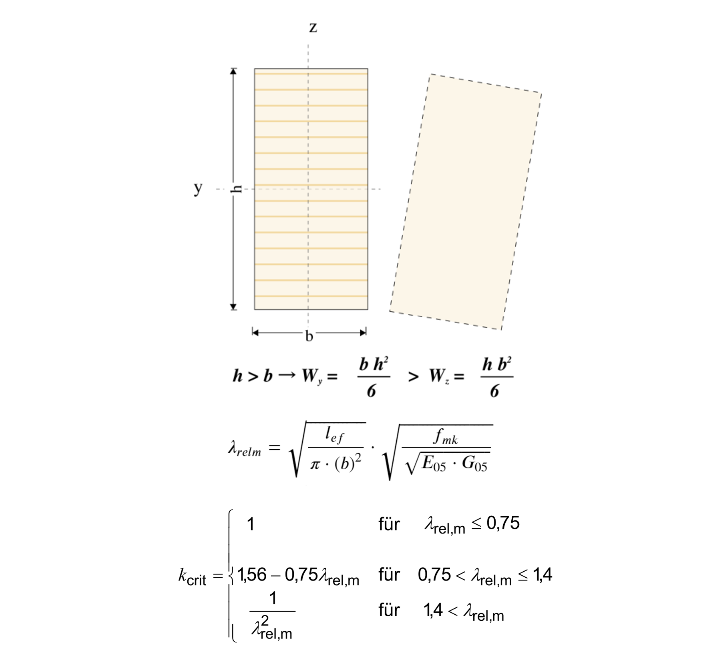
<center> Abbildung 3: Versagensmechanismus Kippen </center> <br>

Der Kippbeiwert kcrit wird mit dem bezogenen Kippschlankheitsgrad λrel,m um die starke Achse berechnet und mindert die entsprechende Biegespannung ab. Die starke Achse wird dabei als diejenige Achse definiert, bei der das Widerstandsmoment Wy größer ist (vgl. Neuhaus 2017: 630).

**um starke Achse**

In [82]:
index = [w_y, w_z].index(max(w_y, w_z))
L_I = [I_y,I_z]
L_w = [w_y,w_z]
L_bh = [[b,h],[h,b]]
L_fmk = [f_myk,f_mzk]
L_k_crit = [1,1]

In [83]:
%%render params
Achse_stark = ['y','z'][index]

w = L_w[index]
b = L_bh[index][0]
h = L_bh[index][1]
f_mk = L_fmk[index]

<IPython.core.display.Latex object>

In [84]:
%%render
lamb_relm = sqrt(l_ef/(pi*b**2))*sqrt(f_mk/sqrt(E_05*G_05)) #bez. Schlankheitsgrad

if lamb_relm <= 0.75: k_crit = 1 #Kippbeiwert
elif lamb_relm > 0.75 and lamb_relm < 1.4: k_crit = 1.56-0.75*lamb_relm #Kippbeiwert
elif lamb_relm > 1.4: k_crit = 1/lamb_relm**2 #Kippbeiwert

<IPython.core.display.Latex object>

In [85]:
if index == 0:
    L_k_crit[0] = k_crit
    L_k_crit[1] = 1
    
elif index == 1:
    L_k_crit[0] = 1
    L_k_crit[1] = k_crit

### Nachweise
Die Nachweise werden in Abhängigkeit der Versagensmechanismen (Knicken und Kippen) und der vorhandenen Schlankheit gewählt. Dadurch ergeben sich folgende Möglichkeiten.

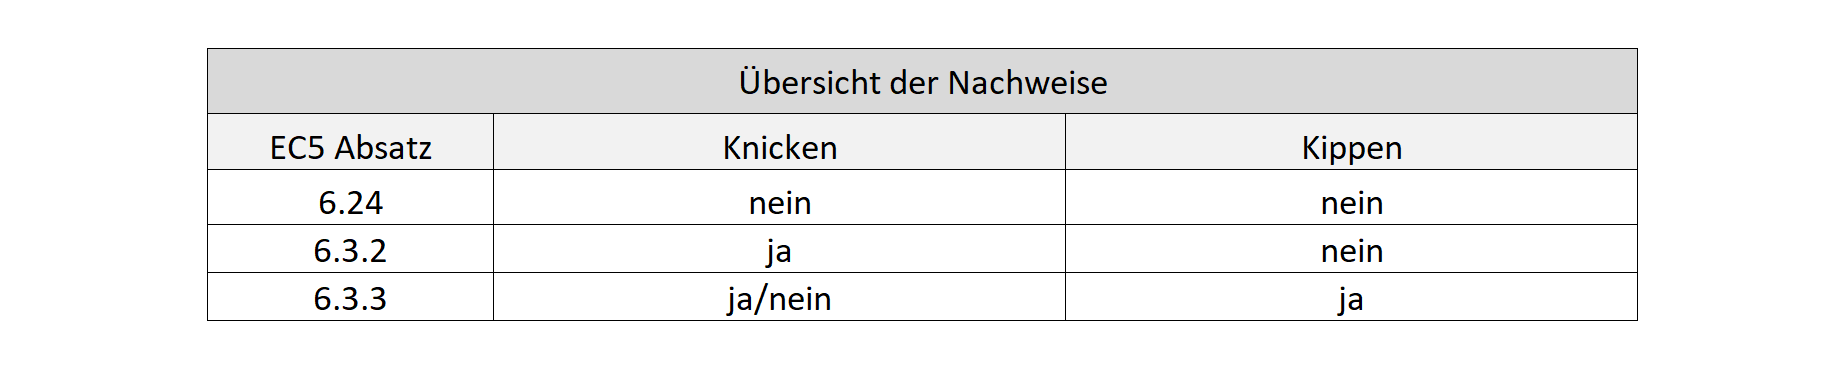
<center> Tabelle 1: Mögliche Nachweise bei der Stützenbemessung</center> <br>

Die Nachweise werden in beide Richtungen geführt, wobei die höhere Ausnutzung maßgebend wird. Mit dem Beiwert ```km``` muss hinzu die Inhomogenitäten des Holzes im Querschnitt berücksichtigt werden (km  = 0.7 für Brettschichtholz). Beim Nachweis der zweiachsigen Biegung wird dieser nacheinander mit der einwirkenden Biegespannung multipliziert. Bei einachsiger Momentenbeanspruchung entfällt der Beiwert. 

In [86]:
%%render 2
if k_crit == 1 and lamb_rel_y < 0.3: eta_y = (sigma_cd/f_c0d)**2 + 1*sigma_myd/f_myd + 0.7*sigma_mzd/f_mzd #EC5 Abs. 6.2.4: Biegung m/o Druck ohne Knicken ohne Kippen
elif k_crit == 1 and lamb_rel_y > 0.3: eta_y = (sigma_cd)/(f_c0d*k_c_y) + 1*sigma_myd/f_myd + 0.7*sigma_mzd/f_mzd #EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen    
elif k_crit < 1: eta_y = (sigma_cd)/(f_c0d*k_c_y) + (sigma_myd/(f_myd*k_crit)) + (sigma_mzd/(f_mzd))**2 #EC5 Abs. 6.3.3: Biegung m/o Druck mit Knicken und Kippen

<IPython.core.display.Latex object>

#### um z-Achse

In [87]:
%%render 2
if k_crit == 1 and lamb_rel_z < 0.3: eta_z = (sigma_cd/f_c0d)**2 + 0.7*sigma_myd/f_myd + 1*sigma_mzd/f_mzd #EC5 Abs. 6.2.4: Biegung m/o Druck ohne Knicken ohne Kippen
elif k_crit == 1 and lamb_rel_z > 0.3: eta_z = (sigma_cd)/(f_c0d*k_c_z) + 0.7*sigma_myd/f_myd + 1*sigma_mzd/f_mzd #EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen    
elif k_crit < 1: eta_y = (sigma_cd)/(f_c0d*k_c_z) + (sigma_myd/(f_myd*k_crit))**2 + (sigma_mzd/(f_mzd)) #EC5 Abs. 6.3.3: Biegung m/o Druck mit Knicken und Kippen

<IPython.core.display.Latex object>

**Listen** <br>
Die Herausforderung beim Umsetzen des Codes ist nun dabei, eine allgemeingültige Programmierung zu entwickeln, die sämtliche Kombinationsmöglichkeiten richtig abbildet. Ein wichtiges Werkzeug, welches permanent zum Einsatz kommt ist die Nutzung von Listen. Es ist eines der unterschiedlichen Möglichkeiten in Python mehrere Werte abzuspeichern. Bei der Bearbeitung mit Datenstrukturen geht es im Wesentlichen um das Zugreifen, Einfügen und Löschen von Elementen und ermöglicht eine bestimmte Struktur der Informationen beizubehalten. <br>

Die Definition von Listen erfolgt analog zu der Definition einer Variablen. Die Einträge werden mit einem Komma getrennt und mit einer eckigen Klammer umfasst. <br>

```python
liste_1 = [5, 6, 7, 8]
liste_2 = [[0, 1, 2], 3, 4] (verschachtelte Liste)
```

**Zugriff auf Listenelemente**  <br>
Auf Listenelemente wird mit einer eckigen Klammer zugegriffen. Bei einer verschachtelten Liste werden zwei Klammern benötigt.

```python
element_1 = liste_1[1]
element_2 = liste_2[0][1]
```

**Einfügen eines Elementes**  <br>
Mit der *append()*-Funktion werden neue Elemente einer Funktion angehängt.
liste_1.append(9)
Einfügen mehrerer Elemente
Möchte man mehrere Elemente anhängen, muss man mit der extend()-Funktion die Elemente in Form einer Liste anhängen.

```python
list_2_new = [5,6]
liste_2.extend(list_2_new)
```

#### Umsetzung in Python

**1.**	Der Nachweis wird mit Hilfe einer Schleife mit if-Abfragen gewählt. Die Schleife funktioniert, indem die Variable ```M``` nacheinander durch die Liste der Momenten ```L_Md``` iteriert und die Werte ```M_yd``` und ```M_zd``` annimmt.  Der Befehl ```enumerate()``` wird zusammen mit der Variable ```n``` verwendet und stellt einen Zähler dar, der in diesem Fall die Werte 0 und 1 zugewiesen bekommt. Diese wird innerhalb der Schleife verwendet, um auf das n-te Element der Listen zuzugreifen.

```python
L_Md = [M_yd, M_zd]	
##Schleife für Nachweise um y- und z-Achse
for n,M in enumerate(L_Md):
```

**2.**	In den if-Abfragen wird gemäß Tabelle xx bestimmt, welche Versagensmechanismen maßgebend sind. Es wird mit dem ```and``` Operator geprüft, ob das Knicken und/oder das Kippen relevant ist. 

```python
if k_crit == 1 and lamb_rel < 0.3:     
        eta = (sigma_cd/f_c0d)**2 + L_km[n][0]*sigma_myd/f_myd + 
  		       L_km[n][1]*sigma_mzd/f_mzd
```

**3.**	Die Positionen bestimmter Beiwerte (z.B. km-Beiwert) variieren je nach Nachweis um die y- oder z-Achse. Daher werden sie vor in der richtigen Reihenfolge Listen gespeichert und mittels Index-Zugang richtig zugeordnet. 

Beispiel: In der Schleife nimmt die Variabel ```n``` nacheinander für die y- und z-Achse den Wert 0 und 1 an. Im ersten Durchgang der Schleife wird mit ```L_km[n]``` die erste Liste innerhalb der verschachtelten Liste angesprochen und mit ```L_km[n][0] = 1``` und ```L_km[n][1] = 0.7``` die Werte richtig positioniert.

```python
L_km = [[1,0.7],[0.7,1]]
```

 
Diese Vorgehensweise wird ebenfalls für die Potenz im Kippnachweis und dem Knickbeiwert ```k_c``` umgesetzt.

```python
L_kc = [k_c_y, k_c_z]   #Knickbeiwerte
L_pot = [[1,2],[2,1]]   #Exponenten für Kippnachweise
```

**4.**	Für den Fall einer einachsigen Momentenbeanspruchung muss vorher noch sichergestellt werden, dass der km-Wert gleich 1 gesetzt wird.


In [88]:
L_Md = [M_yd, M_zd]
lamb_rel = min(lamb_rel_y, lamb_rel_z)
L_km = [[],[]]
L_kc = [k_c_y, k_c_z]
L_pot = [[1,2],[2,1]]
k_crit_index = [w_y, w_z].index(max(w_y, w_z))
L_eta = []

if 0 in L_Md:
    index = L_Md.index(0)
    L_km[0].append(1)
    L_km[0].append(1)
    L_km[1].append(1)
    L_km[1].append(1)
else: 
    L_km = [[1,0.7],[0.7,1]]

#Schleife für Nachweise
for n,M in enumerate(L_Md):
    
    ###EC5 Abs. 6.2.4: Biegung m/o Druck ohne Knicken ohne Kippen
    if k_crit == 1 and lamb_rel < 0.3:
        eta = (sigma_cd/f_c0d)**2 + L_km[n][0]*sigma_myd/f_myd + L_km[n][1]*sigma_mzd/f_mzd
        L_eta.append(eta)
        print(round(eta,2))
        print('EC5 Abs. 6.2.4: Biegung m/o Druck ohne Knicken ohne Kippen')

    ###EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen    
    elif k_crit == 1 and lamb_rel > 0.3:
        eta = (sigma_cd)/(f_c0d*L_kc[n]) + L_km[n][0]*sigma_myd/f_myd + L_km[n][1]*sigma_mzd/f_mzd
        L_eta.append(eta)
        print(round(eta,2))
        print('EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen ')
        
    ###EC5 Abs. 6.3.3: Biegung m/o Druck mit Knicken und Kippen
    elif k_crit < 1:
        eta = (sigma_cd)/(f_c0d*L_kc[n]) + (sigma_myd/(f_myd*L_k_crit[0]))**L_pot[n][0] + (sigma_mzd/(f_mzd*L_k_crit[1]))**L_pot[n][1]
        L_eta.append(eta)
        print(round(eta,2))
        print('EC5 Abs. 6.3.3: Biegung m/o Druck mit Knicken und Kippen')     

0.75
EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen 
0.76
EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen 


### Zusammenfassung der Ergebnisse

In [89]:
print('Die Ausnutzungen des Biegespannungsnachweises nach der Theorie I. Ordnung betragen:')

print('um die y-Achse: η = ' + str(round(L_eta[0],2)) )
print('um die z-Achse: η = ' + str(round(L_eta[1],2)) )

Die Ausnutzungen des Biegespannungsnachweises nach der Theorie I. Ordnung betragen:
um die y-Achse: η = 0.75
um die z-Achse: η = 0.76


# Literaturverzeichnis

[1] Bonacina, Michael (2018): Python 3, Programmieren für Einsteiger, 2. Aufl., Landshut, Deutschland: BMU Verlag. 

[2] DIN EN 14080:2013 (2013):Holzbauwerke-Brettschichtholz und Balkenschichtholz-Anforderungen; Deutsche Fassung EN 14080:2013, Berlin, Deutschland: Beuth-Verlag.

[3] DIN EN 1995-1-1:2010-12 (2010): Eurocode 5: Bemessung und Konstruktion von Holzbauten - Teil 1-1: Allgemeines-Allgemeines regeln und Regeln für den Hochbau, Berlin, Deutschland: Beuth-Verlag.

[4] DIN EN 1995-1-1/NA:2010-12 (2010): Nationaler Anhang – National festgelegte Parameter – Eurocode 5: Bemessung und Konstruktion von Holzbauten – Teil 1-1: Allgemeines – Allgemeine Regeln und Regeln für den Hochbau, Berlin, Deutschland: Beuth-Verlag.

[5] Neuhaus, Helmuth (2017): Ingenieurholzbau, Grundlagen – Bemessung – Nachweise - Beispiele, 4. Aufl., Münster, Deutschland: Springer Vieweg. 

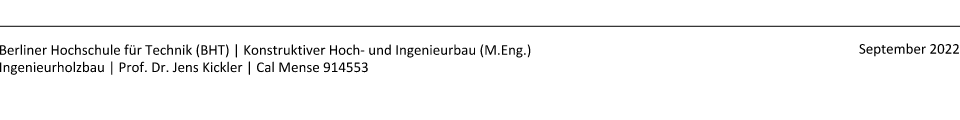